# Testing the CVAE on MNIST dataset

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from dynalearn.datasets.mnist_dataset import load_MNIST, one_hot_to_int, int_to_one_hot
from dynalearn.models.vae import CVAE,FC_CVAE

def display_number(imag, ax):
    ax.imshow(imag, cmap="gray")
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

In [4]:
mnist_train, mnist_test = load_MNIST("./data/mnist", vectorize=True, target_onehot=True, num_train=5000,
                                     num_val=1000)

cvae = FC_CVAE(28 * 28, [512, 256, 128], 2, 10, keepprob=0.99,
               optimizer=lambda p: torch.optim.Adam(p, lr=1e-3, weight_decay=0), use_cuda=False)
print(cvae)

CVAE(
  (encoder): Fc_CEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=794, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.010000000000000009)
      (3): Linear(in_features=512, out_features=256, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.010000000000000009)
      (6): Linear(in_features=256, out_features=128, bias=True)
      (7): Tanh()
      (8): Dropout(p=0.010000000000000009)
    )
    (mu): Linear(in_features=128, out_features=2, bias=True)
    (var): Linear(in_features=128, out_features=2, bias=True)
  )
  (decoder): Fc_CDecoder(
    (decoder): Sequential(
      (0): Linear(in_features=12, out_features=128, bias=True)
      (1): Tanh()
      (2): Dropout(p=0.010000000000000009)
      (3): Linear(in_features=128, out_features=256, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.010000000000000009)
      (6): Linear(in_features=256, out_features=512, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.010000000000000009)
      

## Training the vae

In [6]:
cvae.fit(mnist_train, mnist_test, epochs=40, batch_size=128, verbose=True)

/home/charles/anaconda3/lib/python3.6/site-packages/torch/tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Epoch 10 - Train loss: 140.4974 - Val loss: 142.7719 - Training time: 3.1279 - New best config.
Epoch 11 - Train loss: 139.1203 - Val loss: 141.6606 - Training time: 3.4271 - New best config.
Epoch 12 - Train loss: 137.6439 - Val loss: 140.2509 - Training time: 4.4347 - New best config.
Epoch 13 - Train loss: 136.8475 - Val loss: 139.6479 - Training time: 4.1373 - New best config.
Epoch 14 - Train loss: 135.8899 - Val loss: 138.8939 - Training time: 3.9967 - New best config.
Epoch 15 - Train loss: 134.8598 - Val loss: 138.1391 - Training time: 3.9463 - New best config.
Epoch 16 - Train loss: 134.2014 - Val loss: 137.7354 - Training time: 3.1867 - New best config.
Epoch 17 - Train loss: 133.8828 - Val loss: 137.6384 - Training time: 3.2296 - New best config.
Epoch 18 - Train loss: 133.4559 - Val loss: 137.5142 - Training time: 3.4162 - New best config.
Epoch 19 - Train loss: 133.1686 - Val loss: 137.1537 - Training time: 3.2666 - New best config.
Epoch 20 - Train loss: 131.9996 - Val lo

## Displaying samples for the model


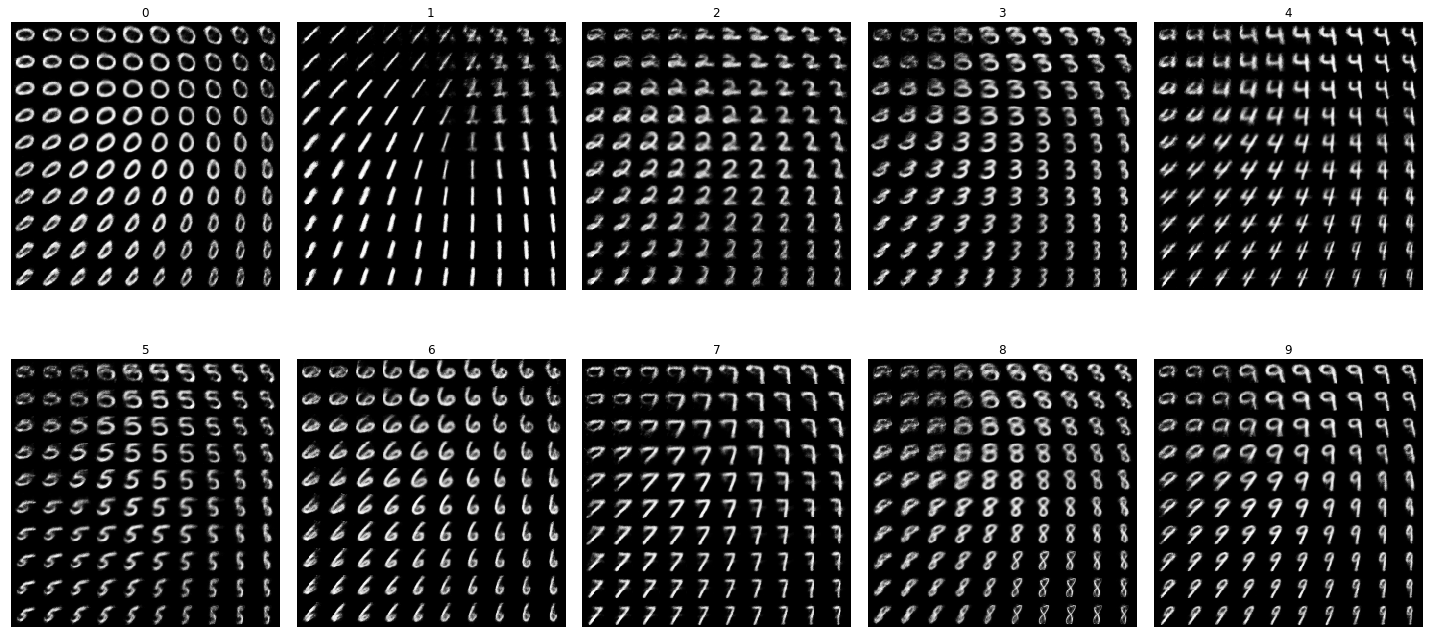

In [44]:
N = 10
N_number = 10
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
z = np.linspace(-4, 4, N)


for l in range(N_number):
    img = np.zeros([N*28, N*28])
    label = int_to_one_hot(torch.tensor(l), 10)
    label.resize_(1, 10)
    c = torch.cat([label, label], 0)
    for k in range(N * N):
        i, j = k // N, k % N

        embedding = torch.tensor([[z[i], z[j]], [z[i], z[j]]])
        x = cvae.decoder(embedding, c).detach().cpu().numpy()
        x = x[0,:].reshape(28, 28)

        img[28 * i : 28 * (i + 1), 28 * j : 28 * (j + 1)] = x
    
    display_number(img, ax[l // 5, l % 5])
    ax[l // 5, l % 5].set_aspect('equal')
    ax[l // 5, l % 5].set_title(str(l))
#plt.subplots_adjust(wspace=-0.8, hspace=0.2)
plt.tight_layout()
fig.savefig('fig/conditional_samples.png')
plt.show()
